In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline%

In [11]:
DATA_IN_PATH = './data_set/'

# Load Train Dataset

In [12]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)

In [13]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [15]:
print('파일 크기 : ')

for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2))+'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [16]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [17]:
train_length = train_data['review'].apply(len)

In [18]:
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

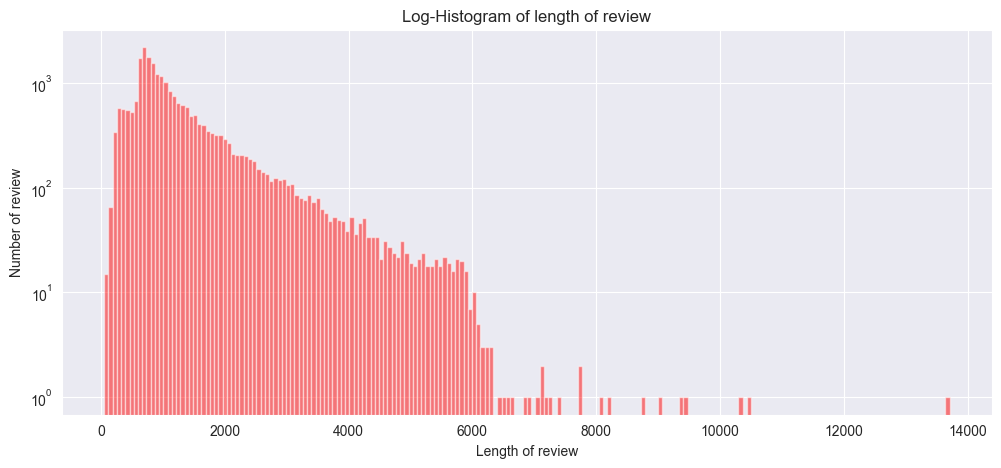

In [23]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [26]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20ba6c88ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x20ba6c885b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ba6c891b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ba6c88640>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ba6c8add0>],
 'means': [<matplotlib.lines.Line2D at 0x20ba6c8ab30>]}

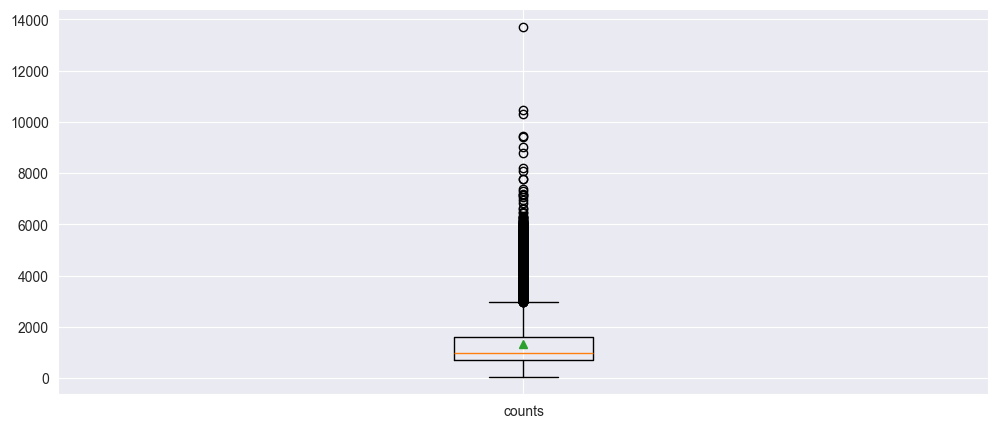

In [27]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, tick_labels=['counts'], showmeans=True)

In [28]:
from wordcloud import WordCloud

(-0.5, 399.5, 299.5, -0.5)

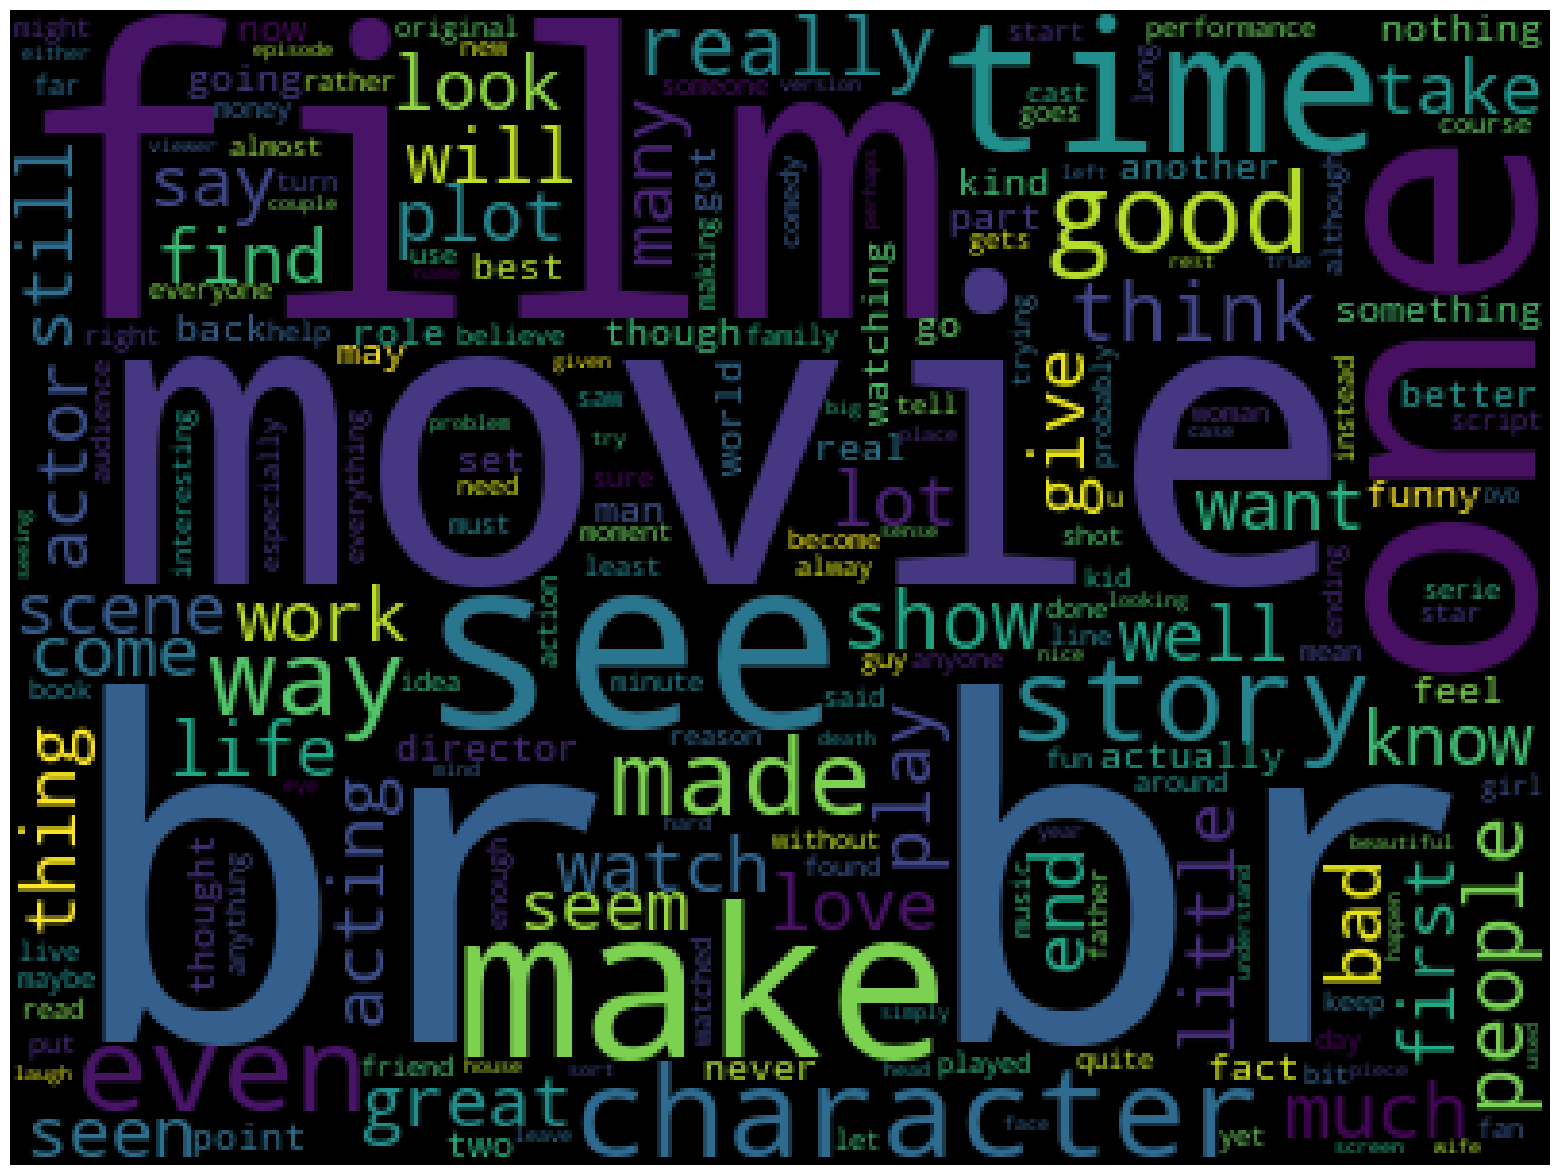

In [30]:
cloud = WordCloud(width=400, height=300).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

Text(0.5, 1.0, 'Sentiment Count Plot')

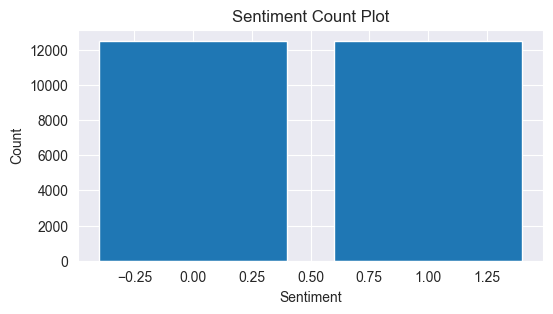

In [40]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(6,3)

# Count the occurrences of each sentiment
sentiment_counts = train_data['sentiment'].value_counts()

# Plot the counts
ax.bar(sentiment_counts.index, sentiment_counts.values)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

In [41]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


In [42]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))